In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qcut-image/qcut.jpg
/kaggle/input/widsdatathon2021/SampleSubmissionWiDS2021.csv
/kaggle/input/widsdatathon2021/SolutionTemplateWiDS2021.csv
/kaggle/input/widsdatathon2021/DataDictionaryWiDS2021.csv
/kaggle/input/widsdatathon2021/UnlabeledWiDS2021.csv
/kaggle/input/widsdatathon2021/TrainingWiDS2021.csv


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
train_df = pd.read_csv('../input/widsdatathon2021/TrainingWiDS2021.csv')
train_df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,1

In [29]:
test_df = pd.read_csv('../input/widsdatathon2021/UnlabeledWiDS2021.csv')
test_df.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,82,admit,Med-Surg ICU,0.015278,0,NaN,2.8,110.0,104.01,0,0,1.9,44.0,1.49,NaN,4.0,6.0,0.0,5.0,97.0,38.0,39.9,0,54.0,NaN,NaN,NaN,NaN,31.0,130.0,36.4,NaN,0,5.4,NaN,NaN,104.0,40.0,104.0,40.0,66.0,38.0,NaN,NaN,123.0,54.0,123.0,54.0,35.0,15.0,100.0,96.0,NaN,NaN,149.0,76.0,149.0,76.0,38.7,35.6,NaN,NaN,59.0,59.0,59.0,59.0,46.0,44.0,NaN,NaN,80.0,80.0,80.0,80.0,19.0,19.0,97.0,96.0,NaN,NaN,116.0,116.0,116.0,116.0,36.4,36.4,2.8,2.8,1.9,1.9,44.0,40.0,9.8,9.3,1.49,1.44,104.0,97.0,26.0,23.0,14.5,14.2,42.8,39.9,NaN,NaN,NaN,NaN,173.0,173.0,5.7,4.9,132.0,130.0,5.6,5.4,2.8,2.8,1.9,1.9,40.0,40.0,9.8,9.8,1.49,1.49,104.0,104.0,26.0,26.0,14.5,14.5,42.8,42.8,NaN,NaN,NaN,NaN,173.0,173.0,4.9,4.9,132.0,132.0,5.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
1,2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,82,admit,Med-Surg ICU,0.000000,0,NaN,NaN,117.0,106.01,0,0,NaN,19.0,0.92,NaN,4.0,6.0,0.0,5.0,73.0,116.0,NaN,0,41.0,NaN,NaN,NaN,NaN,53.0,142.0,36.3,NaN,0,NaN,NaN,NaN,101.0,27.0,101.0

# Summarize the dataset

In [30]:
# dimension of the dataset
print(f'Train_df shape is: {train_df.shape}')

Train_df shape is: (130157, 181)


In [31]:
# dimension of the dataset
print(f'Test_df shape is: {test_df.shape}')

Test_df shape is: (10234, 180)


We have 130,157 observations with 181 features including target variable `diabetes_mellitus`

In [32]:
# peek at the dataset
print(f'Train_df statistical summary: \n{train_df.describe()}')

Train_df statistical summary: 
          Unnamed: 0   encounter_id    hospital_id            age  \
count  130157.000000  130157.000000  130157.000000  125169.000000   
mean    65079.000000  213000.856519     106.102131      61.995103   
std     37573.233831   38109.828146      63.482277      16.822880   
min         1.000000  147000.000000       1.000000       0.000000   
25%     32540.000000  180001.000000      49.000000      52.000000   
50%     65079.000000  213014.000000     112.000000      64.000000   
75%     97618.000000  246002.000000     165.000000      75.000000   
max    130157.000000  279000.000000     204.000000      89.000000   

                 bmi  elective_surgery         height         icu_id  \
count  125667.000000     130157.000000  128080.000000  130157.000000   
mean       29.110260          0.189840     169.607219     662.428344   
std         8.262776          0.392176      10.833085     304.259843   
min        14.844926          0.000000     137.200000      

In [33]:
print({train_df.info(verbose = True, null_counts = True)})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Data columns (total 181 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   130157 non-null  int64  
 1   encounter_id                 130157 non-null  int64  
 2   hospital_id                  130157 non-null  int64  
 3   age                          125169 non-null  float64
 4   bmi                          125667 non-null  float64
 5   elective_surgery             130157 non-null  int64  
 6   ethnicity                    128570 non-null  object 
 7   gender                       130091 non-null  object 
 8   height                       128080 non-null  float64
 9   hospital_admit_source        96959 non-null   object 
 10  icu_admit_source             129917 non-null  object 
 11  icu_id                       130157 non-null  int64  
 12  icu_stay_type                130157 non-null  object 
 13

In [34]:
# let's check the class distribution
print(f'Class distribution in train_df: \n{train_df.groupby("diabetes_mellitus").size()}')

Class distribution in train_df: 
diabetes_mellitus
0    102006
1     28151
dtype: int64


It is obvious that there is an imbalance in the target class with about 78.3% biased to people who are free of diabetes 

In [35]:
# investigating missing values per column sorted in Desc order in %
round(train_df.isnull().mean().mul(100).sort_values(ascending = False), 2)

h1_bilirubin_min               92.09
h1_bilirubin_max               92.09
h1_albumin_min                 91.43
h1_albumin_max                 91.43
h1_lactate_max                 91.02
h1_lactate_min                 91.02
h1_pao2fio2ratio_min           87.12
h1_pao2fio2ratio_max           87.12
h1_arterial_ph_min             82.86
h1_arterial_ph_max             82.86
h1_arterial_pco2_max           82.72
h1_arterial_pco2_min           82.72
h1_arterial_po2_min            82.55
h1_arterial_po2_max            82.55
h1_hco3_min                    81.74
h1_hco3_max                    81.74
h1_wbc_max                     81.43
h1_wbc_min                     81.43
h1_calcium_max                 81.38
h1_calcium_min                 81.38
h1_platelets_min               81.23
h1_platelets_max               81.23
h1_bun_min                     80.66
h1_bun_max                     80.66
h1_diasbp_invasive_max         80.54
h1_diasbp_invasive_min         80.54
h1_sysbp_invasive_max          80.52
h

In [36]:
# set a treshhold - only trues should be either imputed or dropped -> will investigate more in EDA
treshold = 30
(train_df.isnull().sum().sort_values()/len(train_df) * 100) < treshold

Unnamed: 0                      True
lymphoma                        True
leukemia                        True
immunosuppression               True
hepatic_failure                 True
cirrhosis                       True
aids                            True
solid_tumor_with_metastasis     True
ventilated_apache               True
intubated_apache                True
arf_apache                      True
apache_post_operative           True
readmission_status              True
pre_icu_los_days                True
diabetes_mellitus               True
icu_stay_type                   True
icu_type                        True
encounter_id                    True
icu_id                          True
hospital_id                     True
elective_surgery                True
gender                          True
icu_admit_source                True
d1_heartrate_max                True
d1_heartrate_min                True
d1_sysbp_max                    True
d1_sysbp_min                    True
d

Investigating what type of missing values are 

* Missing Values
* % of Total Values
* Data Type

In [37]:

def missing_zero_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = round(df.isnull().mean().mul(100), 2)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {df.index.name:'col_name', 0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data_type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0 ].sort_values(
        '% of Total Values', ascending=False)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table.reset_index()

In [38]:
missing = missing_zero_values_table(train_df)
missing[:20].style.background_gradient(cmap='Reds')

Your selected dataframe has 181 columns and 130157 Rows.
There are 160 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,h1_bilirubin_min,119861,92.090000,float64
1,h1_bilirubin_max,119861,92.090000,float64
2,h1_albumin_max,119005,91.430000,float64
3,h1_albumin_min,119005,91.430000,float64
4,h1_lactate_max,118467,91.020000,float64
5,h1_lactate_min,118467,91.020000,float64
6,h1_pao2fio2ratio_min,113397,87.120000,float64
7,h1_pao2fio2ratio_max,113397,87.120000,float64
8,h1_arterial_ph_max,107849,82.860000,float64
9,h1_arterial_ph_min,107849,82.860000,float64


Check the test data missing values


In [39]:
missing_test = missing_zero_values_table(test_df)

missing_test[:20].style.background_gradient(cmap='Greens')

Your selected dataframe has 180 columns and 10234 Rows.
There are 159 columns that have missing values.


,index,Missing Values,% of Total Values,Data_type
0,h1_lactate_min,9421,92.060000,float64
1,h1_lactate_max,9421,92.060000,float64
2,h1_bilirubin_min,9407,91.920000,float64
3,h1_bilirubin_max,9407,91.920000,float64
4,h1_albumin_max,9365,91.510000,float64
5,h1_albumin_min,9365,91.510000,float64
6,h1_pao2fio2ratio_min,8812,86.110000,float64
7,h1_pao2fio2ratio_max,8812,86.110000,float64
8,h1_arterial_ph_min,8401,82.090000,float64
9,h1_arterial_ph_max,8401,82.090000,float64


In [40]:
# Investigate categorical variables and how many levels each one has in one bug dictionary
temp = {str(k): list(v) for k, v in train_df.groupby(train_df.dtypes, axis=1)}


We can see here that the target variable is presented as an `int64` not object representation!!

Check for rare labels, how many subcategories per each categorical variable. This would help when feature engineering to reduce the feature space to include important features only that would make the final model more robust. Eliminating rare labels, if doesn't have effect on the target variable, would ultimately enhance the predictive power. 

In [41]:
for c in train_df:
    if train_df[c].dtypes == 'object':
        print(f'{c} has {train_df[c].unique()} \n')
        print(f'{train_df[c].value_counts()} \n')
        print(f'Missing count: {train_df[c].isnull().sum()}')
        print('================')

ethnicity has ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown'] 

Caucasian           100236
African American     13911
Other/Unknown         6261
Hispanic              5049
Asian                 2198
Native American        915
Name: ethnicity, dtype: int64 

Missing count: 1587
gender has ['M' 'F' nan] 

M    70518
F    59573
Name: gender, dtype: int64 

Missing count: 66
hospital_admit_source has ['Floor' 'Emergency Department' 'Operating Room' nan 'Direct Admit'
 'Other Hospital' 'Other ICU' 'ICU to SDU' 'Recovery Room'
 'Chest Pain Center' 'Step-Down Unit (SDU)' 'Acute Care/Floor' 'PACU'
 'Observation' 'ICU' 'Other'] 

Emergency Department    51258
Operating Room          13757
Floor                   11324
Direct Admit             8253
Recovery Room            4563
Other Hospital           2417
Acute Care/Floor         2097
Step-Down Unit (SDU)     1607
PACU                     1031
Other ICU                 283
Chest Pain Center         25

In [42]:
def skew_test(df):
    col = df.skew(axis = 0, skipna = True)
    val = df.skew(axis = 0, skipna = True) 
    sk_table = pd.concat([col, val], axis = 1)
    sk_table = sk_table.rename(
    columns = {0 : 'skewness'})
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(sk_table.shape[0]) +
          " columns that have skewed values - Non Gaussian distribution.")
    return sk_table.drop([1], axis = 1).sort_values('skewness',ascending = False).reset_index()



In [43]:
skk = skew_test(train_df)
skk[:20].style.background_gradient(cmap='Blues')

Your selected dataframe has 181 columns and 130157 Rows.
There are 175 columns that have skewed values - Non Gaussian distribution.


,index,skewness
0,aids,31.118230
1,lymphoma,15.356752
2,pre_icu_los_days,12.665102
3,leukemia,11.570382
4,gcs_unable_apache,9.188000
5,d1_bilirubin_min,8.908617
6,h1_bilirubin_min,8.841709
7,h1_bilirubin_max,8.837047
8,d1_bilirubin_max,8.653272
9,bilirubin_apache,8.611120


# Visualization
For this section, we would infer more insights from the data to get a more clear idea of the business problem. We will start by univariate visualation per feature - starting with categorical variables. After that, will investigate more using bivariate analysis, finally multivariate analysis to figure out the relations between features and target variable. 

# Univariate Analysis
We will start with some univariate plots, that is, plots of each individual variable. Given that
the input variables are numeric, we can create box and whisker plots of each.

In [44]:
missing.head()

,index,Missing Values,% of Total Values,Data_type
0,h1_bilirubin_min,119861,92.09,float64
1,h1_bilirubin_max,119861,92.09,float64
2,h1_albumin_max,119005,91.43,float64
3,h1_albumin_min,119005,91.43,float64
4,h1_lactate_max,118467,91.02,float64


In [45]:
missing.columns

Index(['index', 'Missing Values', '% of Total Values', 'Data_type'], dtype='object')

In [46]:
train_df.columns

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=181)

In [47]:
# Use plotly to plot interactive bar chart
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = train_df['diabetes_mellitus'].value_counts().index, y = train_df['diabetes_mellitus'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

# Visualize categorical variable
For simplicity, I will partitioning the train dataset into sub dataframes. 

In [48]:
target_df = train_df[['diabetes_mellitus']]
target_df.shape

(130157, 1)

In [49]:
cat_pred_df = train_df.select_dtypes('object')
cat_train = pd.concat([cat_pred_df, target_df], axis = 1)
cat_train.head()

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,diabetes_mellitus
0,Caucasian,M,Floor,Floor,admit,CTICU,1
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,1
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,0
4,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,0


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



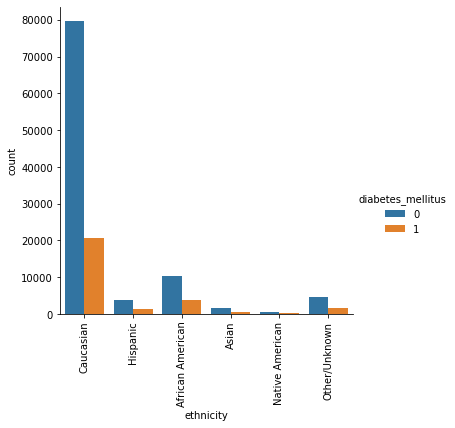

In [52]:
# f, ax = plt.subplots(figsize = (6,10))
sns.set_color_codes('pastel')
g = sns.factorplot(x = 'ethnicity', hue = 'diabetes_mellitus',data = cat_train[cat_train.ethnicity.notnull()], kind = 'count')
g.set_xticklabels(rotation=90)
plt.show()

Caucasians seems to have the majority amonge other ethnicities who admit to the hospital. On the other hand, Native American and Asians who admitted to the hospital less than 10,000. 

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



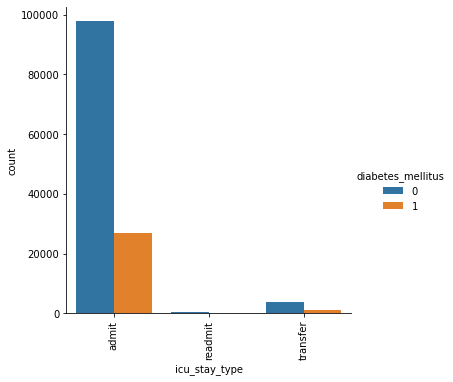

In [53]:
sns.set_color_codes('muted')
g = sns.factorplot(x = 'icu_stay_type', hue = 'diabetes_mellitus',data = cat_train[cat_train.icu_stay_type.notnull()], kind = 'count')
g.set_xticklabels(rotation=90)
plt.show()

It seems that both icu_stay_type and transfer may be considered as rare labels when we come to the data processing step. 

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



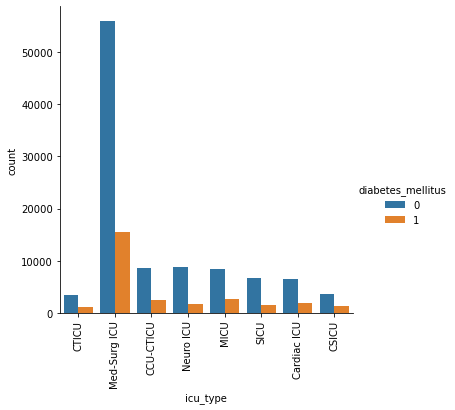

In [54]:
sns.set_color_codes('muted')
g = sns.factorplot(x = 'icu_type', hue = 'diabetes_mellitus',data = cat_train[cat_train.icu_type.notnull()], kind = 'count')
g.set_xticklabels(rotation=90)
plt.show()

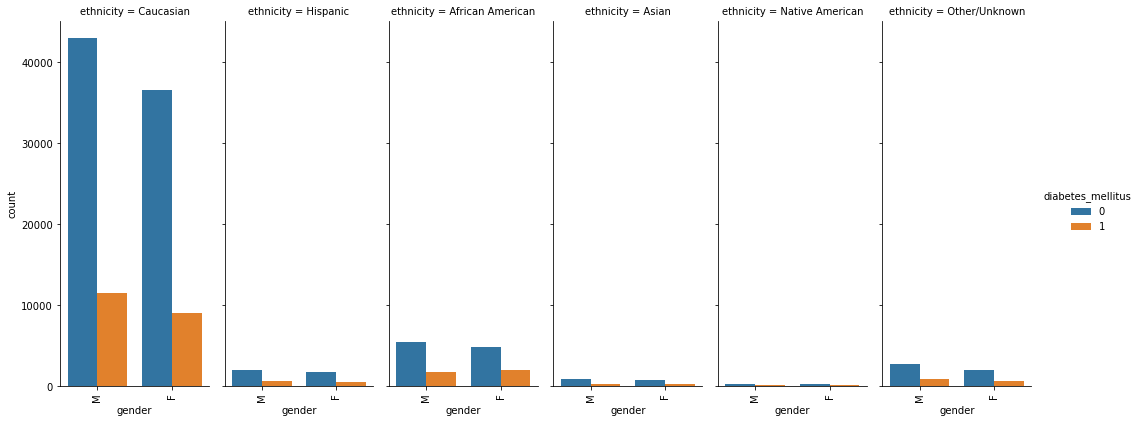

In [56]:
sns.set_color_codes('muted')
t = sns.catplot(x = 'gender', hue = 'diabetes_mellitus', col = 'ethnicity', 
                data = cat_train, kind = 'count', height = 6, aspect = 0.4)
t.set_xticklabels(rotation=90)
plt.show()

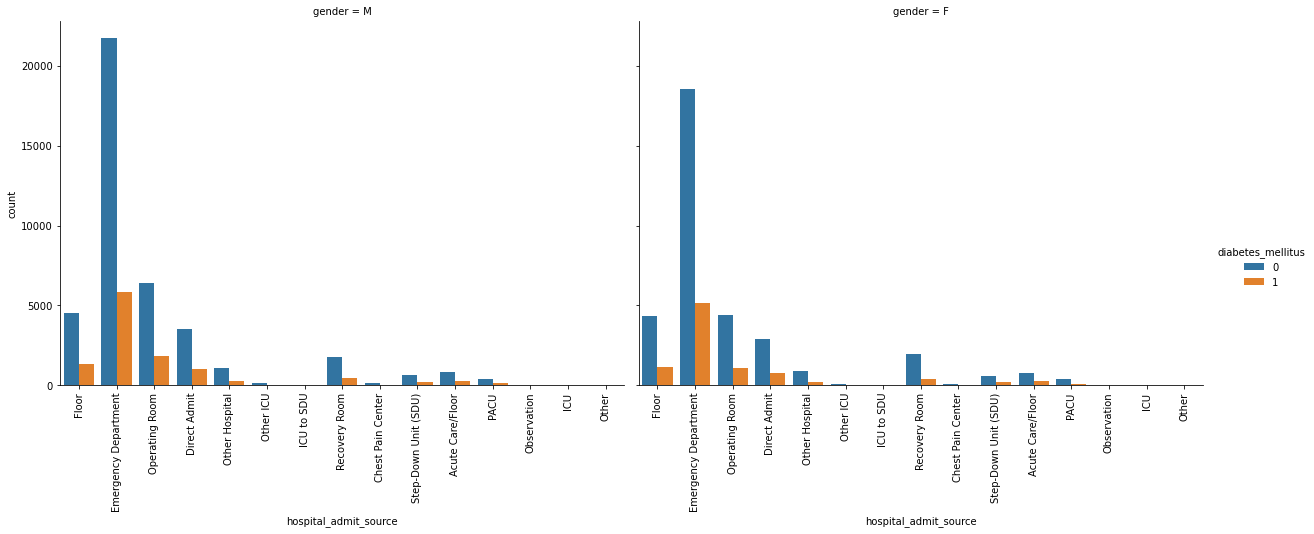

In [70]:
sns.set_color_codes('muted')
t = sns.catplot(x = 'hospital_admit_source', hue = 'diabetes_mellitus', col = 'gender', 
                data = cat_train, kind = 'count', height = 6, aspect = 1.4)
t.set_xticklabels(rotation=90)
plt.show()

Majority of cases came from ER department

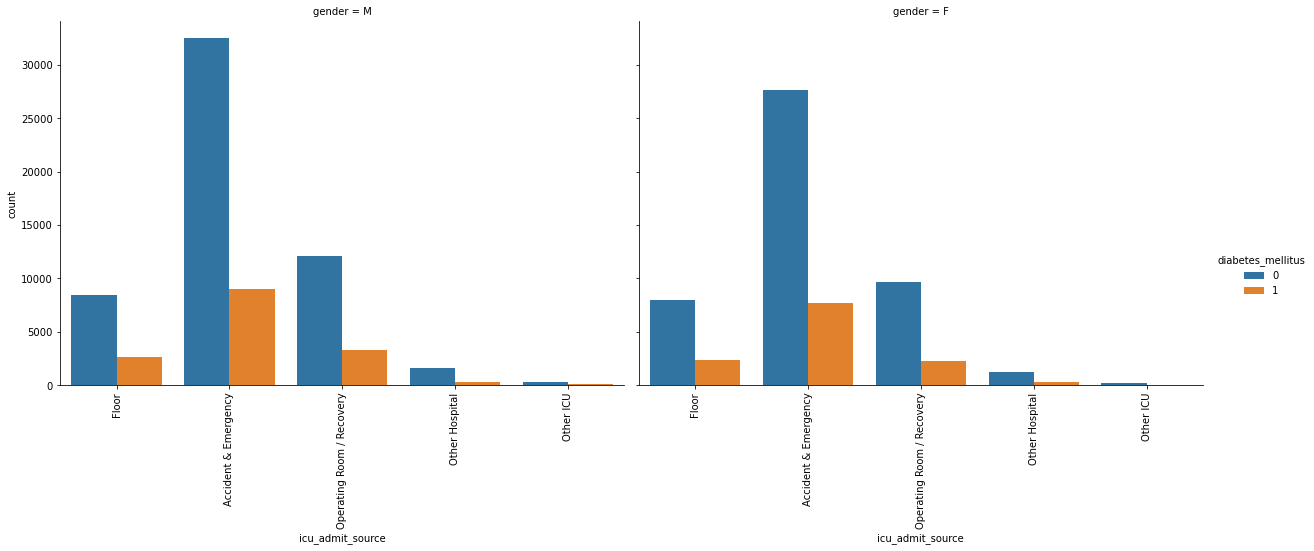

In [71]:
sns.set_color_codes('muted')
t = sns.catplot(x = 'icu_admit_source', hue = 'diabetes_mellitus', col = 'gender', 
                data = cat_train, kind = 'count', height = 6, aspect = 1.4)
t.set_xticklabels(rotation=90)
plt.show()

Your selected dataframe has 7 columns and 130157 Rows.
There are 4 columns that have missing values.


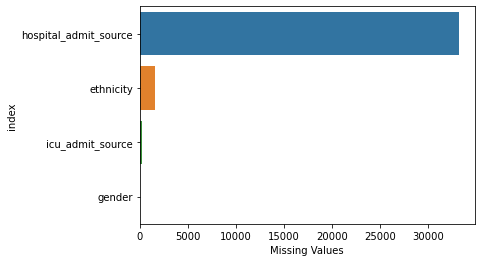

In [61]:
# let's check the missing patterns
cat_missing = missing_zero_values_table(cat_train)
cat_missing.head()
sns.barplot(x = 'Missing Values', y = 'index', data = cat_missing)

plt.show()

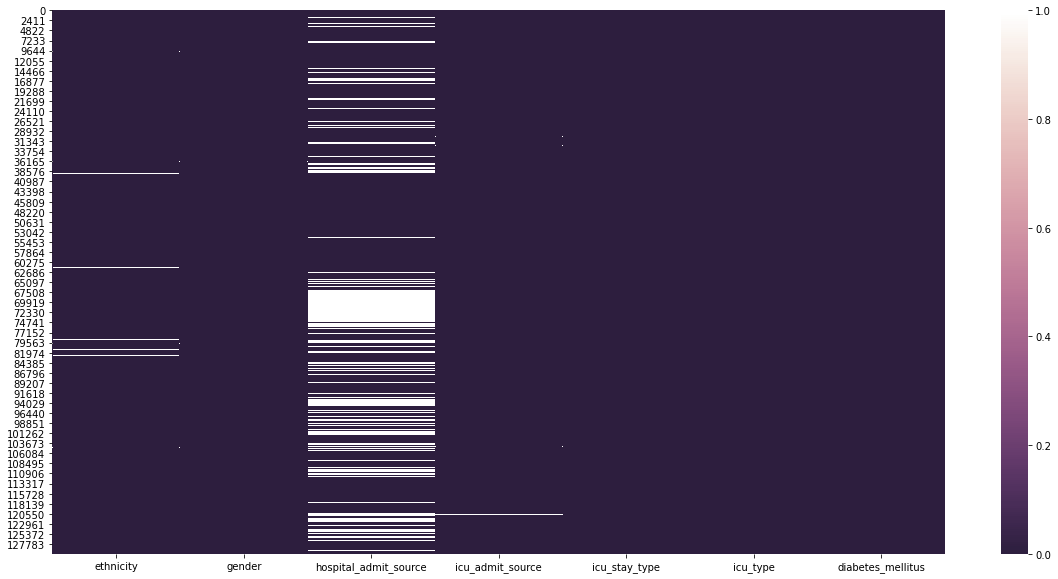

In [64]:
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(cat_train.isnull(), cmap=cmap)

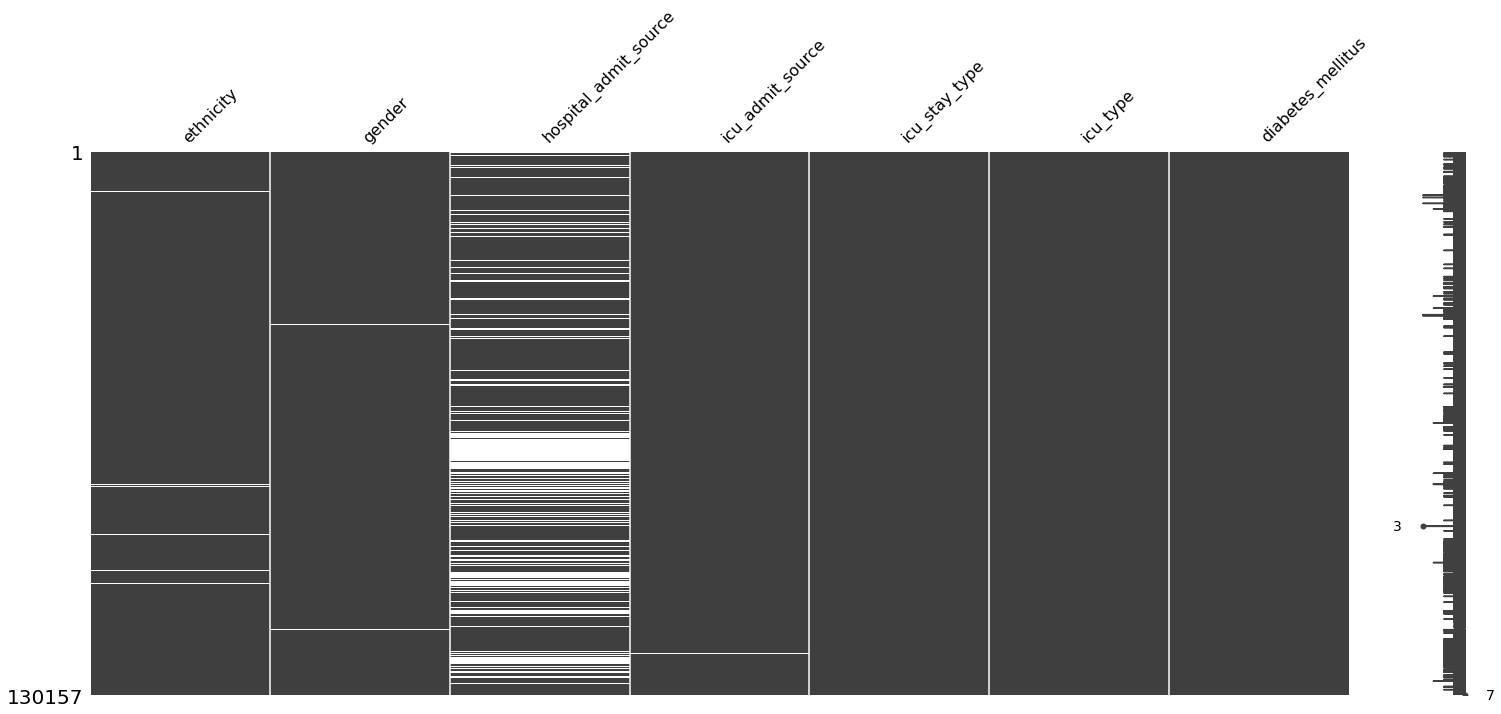

In [67]:
msno.matrix(cat_train)

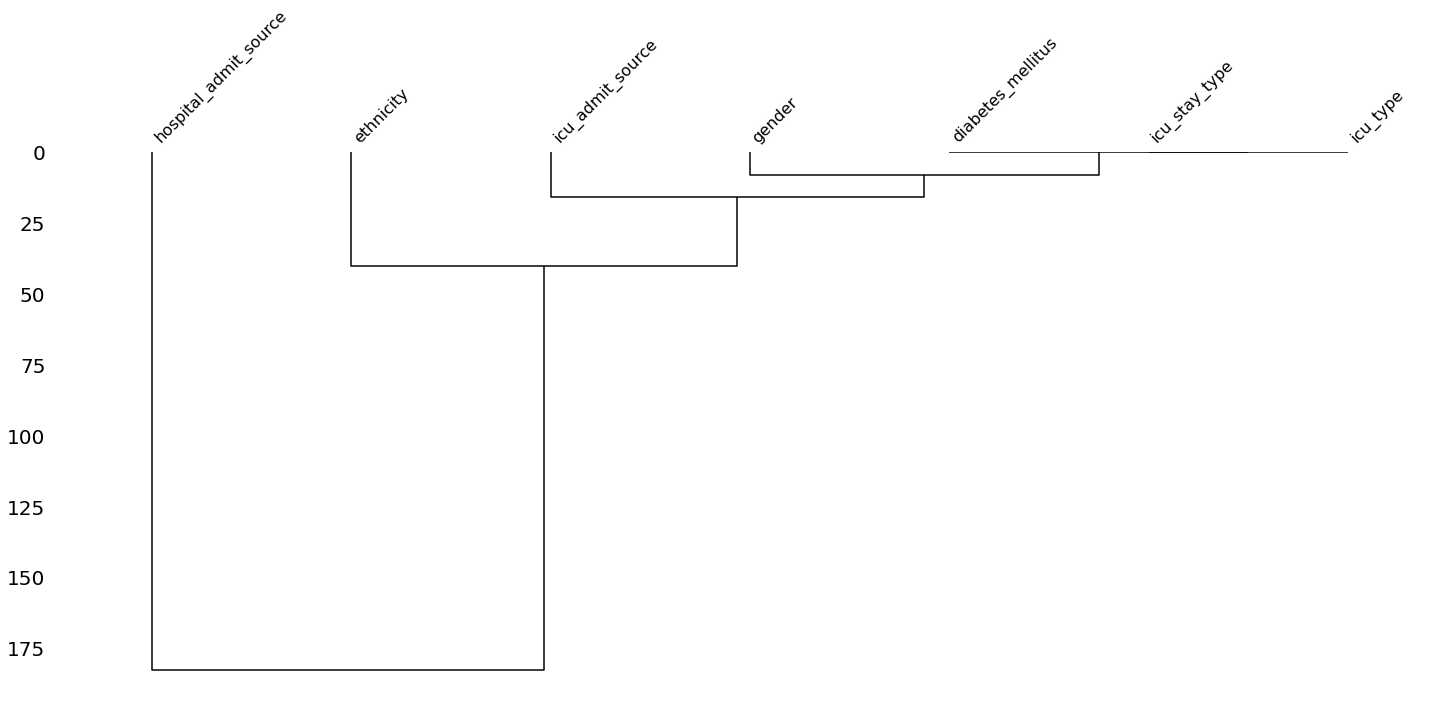

In [73]:
msno.dendrogram(cat_train)

## Results - Categorical variables

It seems that hospital_admit_source could be dropped in the preprocess step as from the dendrogram, there is a big difference in the cluster between target variable `diabetes_mellitus` and the `hospital_admit_source` variable. However, the `icu_admit_source` seems much closer to the target variable - has a shorter tree. 

For the rest of the variables, we need to include into the model. However, we need to impute some of the variables. Also, we may consider to remove rare-labels like the `icu_admit_source` to reduce noise and feature space. 

<hr>

In [ ]:
f, ax = plt.subplots(figsize = (6,20))
sns.set_color_codes('pastel')
sns.barplot(x = 'Missing Values', y = 'index', data = missing)

plt.show()

In [ ]:
f, ax = plt.subplots(figsize = (6,20))
sns.set_color_codes('muted')
sns.barplot(x = '% of Total Values', y = 'index', data = missing)

plt.show()

In [ ]:
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(train_df.isnull(), cmap=cmap)

In [ ]:
import missingno as msno
%matplotlib inline
msno.heatmap(train_df.sample(1000), labels = True, fontsize=10)

In [ ]:
msno.dendrogram(train_df)

In [ ]:
# Lets bin the numeric variables,since they are severly skewed
pd.qcut(train_df['age'], q = 4).value_counts()

In [ ]:
from IPython.display import Image
Image("../input/qcut-image/qcut.jpg")

One important item to keep in mind when using qcut is that the quantiles must all be less than 1. Here are some examples of distributions. In most cases it’s simpler to just define q as an integer:
* terciles: q=[0, 1/3, 2/3, 1] or q=3
* quintiles: q=[0, .2, .4, .6, .8, 1] or q=5
* sextiles: q=[0, 1/6, 1/3, .5, 2/3, 5/6, 1] or q=6

In [ ]:
# selecting only the numeric vars and create buckets 


In [ ]:
plt.figure(figsize=(26, 3 * len(train_df.columns.))
for c, i in enumerate(train_df.columns):
    if train_df[c].dtypes in ['float64', 'int64']:
        plt.subplot(3, 4, i + 1)
        plt.hist(df[c], color='blue', bins=100)
        plt.title(c)

In [ ]:
sns.distplot(train_df.select_dtypes('number').iloc[:,8],fit=norm, kde=False,ax=plt.gca())

In [ ]:
from scipy.stats import norm
fig, ax = plt.subplots(figsize = (12, 10))
for i, col in enumerate(train_df.select_dtypes('number').columns):
    plt.subplot(25, 40, i+1)
    sns.distplot(train_df.select_dtypes('number').iloc[:,i],fit=norm, kde=False,ax=plt.gca())
    plt.axis('off')
plt.tight_layout()